In [8]:
# general libraries
import os # os stands for "operating system" and includes read/write routines etc. 
import numpy as np # by far the most used library for everyday computation
from scipy import stats # here we import a whole sub-library of stats functions
from matplotlib import pyplot as plt # all of our plotting is done with plt
%matplotlib inline 
# %matplotlib notebook # if you need to zoom into a figure, this is the "interactive" mode of IPython

# import rastermap
from rastermap import utils, Rastermap

# 直接指定文件路径，避免每次都弹出文件选择对话框
file_path = '/Users/liuqr/files/MFiles/Liu_dataAnalysis/original_program/python_program/test_data/spk_M3.npy'
print(file_path)

# 使用内存映射加载文件
spks = np.load(file_path, mmap_mode='r')
n_neurons, n_time = spks.shape
print(f"{n_neurons} neurons by {n_time} timepoints")

# 加载其他数据文件
xpos = np.load('/Users/liuqr/files/MFiles/Liu_dataAnalysis/original_program/python_program/test_data/centerX_M3.npy', mmap_mode='r')
ypos = np.load('/Users/liuqr/files/MFiles/Liu_dataAnalysis/original_program/python_program/test_data/centerY_M3.npy', mmap_mode='r')
contrast = np.load('/Users/liuqr/files/MFiles/Liu_dataAnalysis/original_program/python_program/test_data/cont_M3.npy', mmap_mode='r')

contrast = contrast * 100 # convert to percentage
dat = {
    "spks": spks,
    "xpos": xpos,
    "ypos": ypos,
    "contrast": contrast
}

print(f"{n_neurons} neurons by {n_time} timepoints")

/Users/liuqr/files/MFiles/Liu_dataAnalysis/original_program/python_program/test_data/spk_M3.npy
495 neurons by 4320 timepoints
495 neurons by 4320 timepoints


(0.9, 1.1)

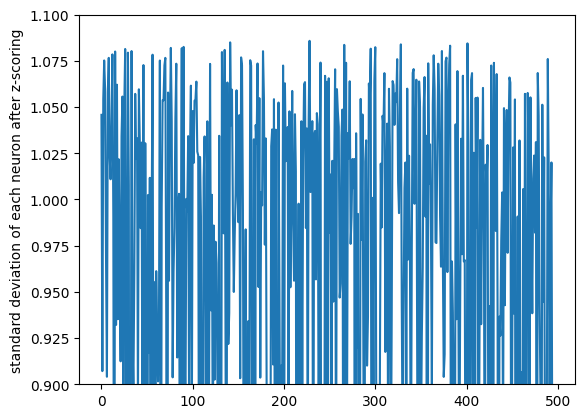

In [9]:
# we will z-score each neuron so that the activity is standard deviation 1 and mean 0 for each neuron

# REPLACE ????? with the correct function from a package that we already imported (google is your friend)
#spks = stats.zscore(spks, axis=1)

#print("Data z-scored")

# colors for the behaviors
kp_colors = np.array([[0.55,0.55,0.55], [0.,0.,1],
                      [0.8,0,0], [1.,0.4,0.2],
                      [0,0.6,0.4], [0.2,1,0.5],
                      ])


plt.plot(spks.std(axis=1))
plt.ylabel('standard deviation of each neuron after z-scoring')
plt.ylim([0.9, 1.1])

(np.float64(-315.50296410686065),
 np.float64(381.62117832079934),
 np.float64(-361.95642722486417),
 np.float64(335.1677152027958))

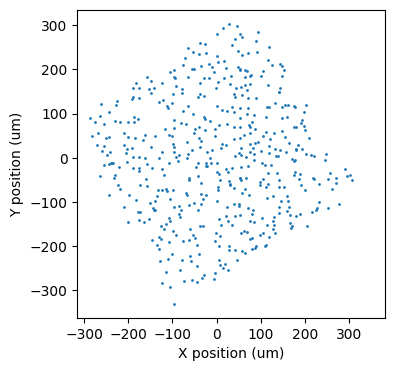

In [10]:
# POSITIONS OF ALL NEURONS
plt.figure(figsize=(4, 4))
plt.scatter(ypos, xpos, s = 1)
plt.xlabel('X position (um)')
plt.ylabel('Y position (um)')
plt.axis("square")

In [11]:
from rastermap import Rastermap

### run rastermap
model = Rastermap(n_clusters=100, n_PCs=128, locality=0,
                  time_lag_window=5).fit(spks)
cc_nodes = model.cc.copy()

# isort contains the neuron indices re-ordered by rastermap
isort = model.isort

# embedding is the embedding position for each neuron from rastermap
embedding = model.embedding[:,0]

2024-11-28 16:30:40,121 [INFO] normalizing data across axis=1
2024-11-28 16:30:40,132 [INFO] projecting out mean along axis=0
2024-11-28 16:30:40,142 [INFO] data normalized, 0.02sec
2024-11-28 16:30:40,142 [INFO] sorting activity: 495 valid samples by 4320 timepoints
2024-11-28 16:30:40,459 [INFO] n_PCs = 128 computed, 0.34sec
2024-11-28 16:30:40,525 [INFO] 67 clusters computed, time 0.40sec
2024-11-28 16:30:41,960 [INFO] clusters sorted, time 1.84sec
2024-11-28 16:30:41,980 [INFO] clusters upsampled, time 1.86sec
2024-11-28 16:30:41,993 [INFO] rastermap complete, time 1.87sec


In [13]:
nbin = 1 # number of neurons to bin over 
ndiv = (n_neurons//nbin) * nbin #maximum number of neurons that is a multiple of nbin

# REPLACE ????? with the re-ordering of the rows of the neural activity matrix using the sorting from Rastermap
sn = spks[isort]

# group sorted matrix into rows of length nbin
sn = sn[:ndiv].reshape(ndiv//nbin, nbin, -1)

print(sn.shape)

# take mean over neurons in a bin
sn = sn.mean(axis=1)

print(sn.shape)

(495, 1, 4320)
(495, 4320)


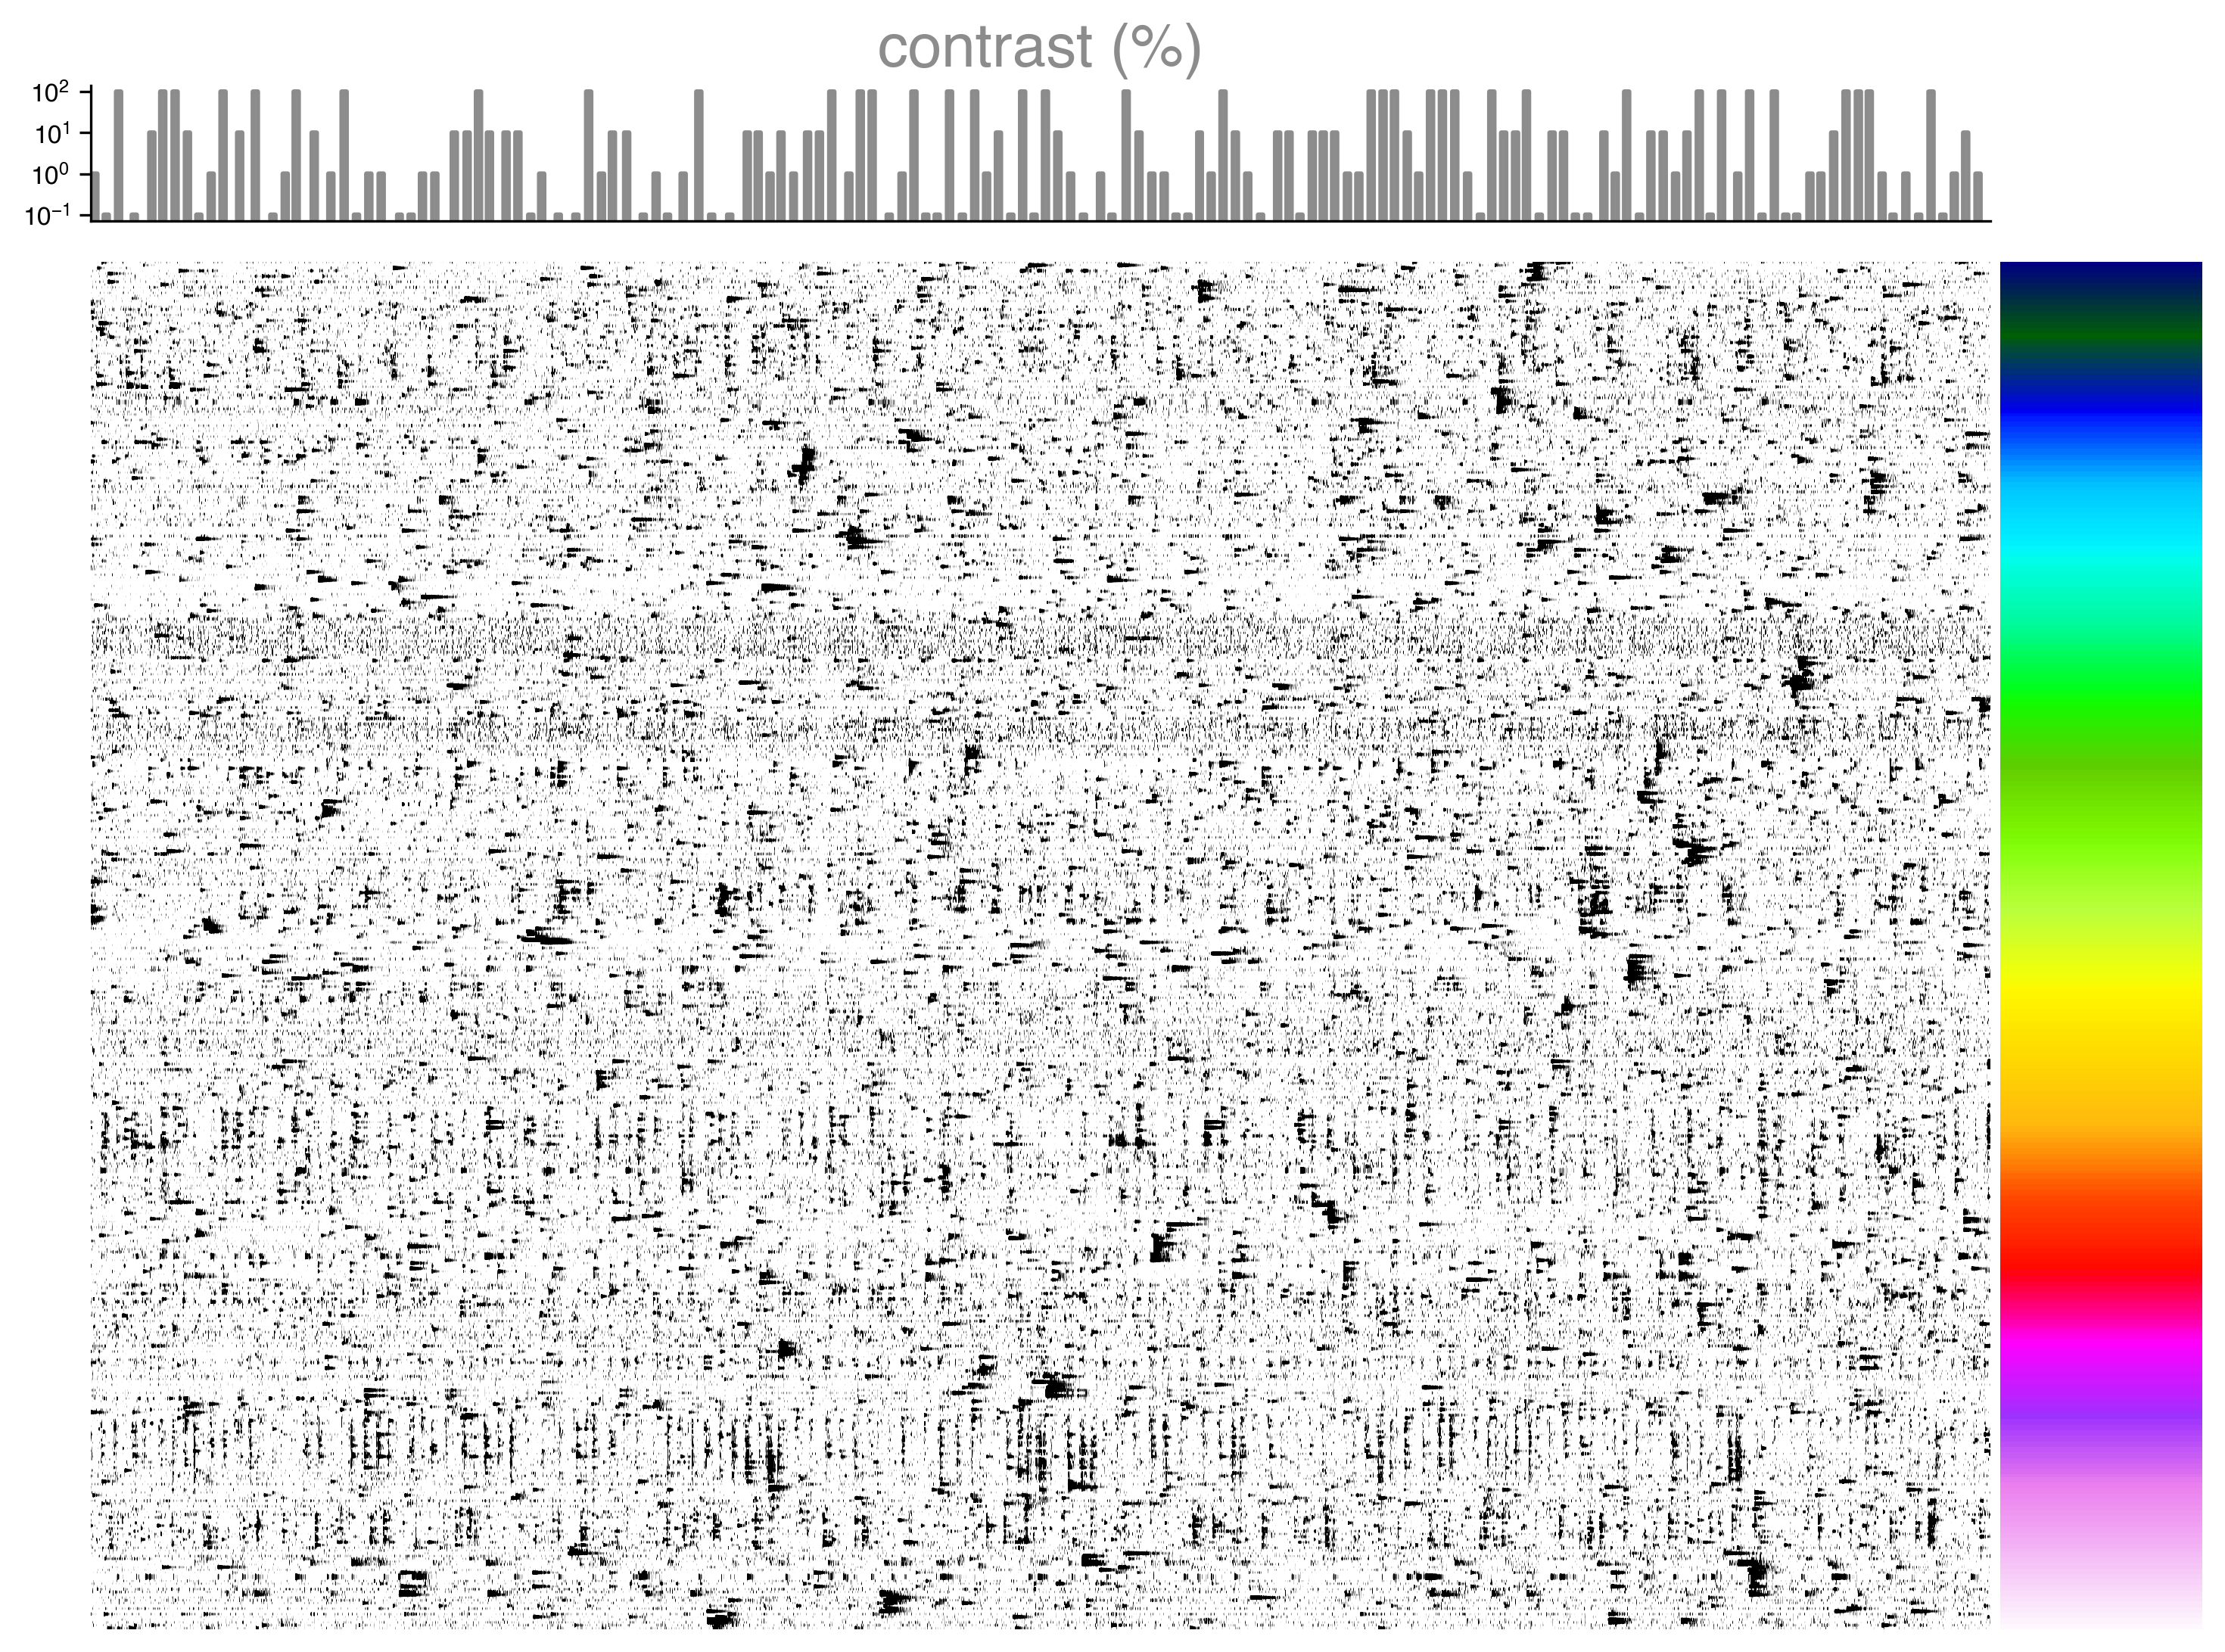

In [42]:
# timepoints to visualize
#set the font size and font family
#set the size of the figure
#set the dpi of the figure
plt.rcParams.update({'font.size': 16, 'font.family': 'helvetica'})
xmin = 0  # YOU can change this number
xmax = xmin + 4000

fig = plt.figure(figsize=(12,10), dpi=300)
grid = plt.GridSpec(9, 10, figure=fig, wspace = 0.05, hspace = 0.3)

# plot running speed
ax = plt.subplot(grid[0, :-1])

# plot the contrast level change over time
ax.plot(contrast[0,xmin:xmax], color=kp_colors[0])
ax.set_xlim([0, xmax-xmin])

#show the y axis with log scale
ax.set_yscale("log")
ax.set_yticks([0.1, 1, 10, 100])
#set font size of y ticks
ax.yaxis.set_tick_params(labelsize=8)
#remove the x axis
ax.xaxis.set_visible(False)
ax.set_title("contrast (%)", color=kp_colors[0])
#remove the surrounding box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plot superneuron activity

# leave a little more space at the bottom of the page


ax = plt.subplot(grid[1:, :-1])
plt.subplots_adjust(bottom=0.2)
# replace ????? with the sorted and binned neural activity in the interval xmin to xmax
ax.imshow(sn[:, xmin:xmax], cmap="gray_r", vmin=0, vmax=0.8, aspect="auto")
ax.set_xlabel("time")
ax.set_ylabel("superneurons")
#remove the axis 
ax.axis("off")

ax = plt.subplot(grid[1:, -1])
ax.imshow(np.arange(0, len(sn))[:,np.newaxis], cmap="gist_ncar", aspect="auto")
ax.axis("off")

#save the figure as svg
plt.savefig("raster_M3.svg", format="svg")

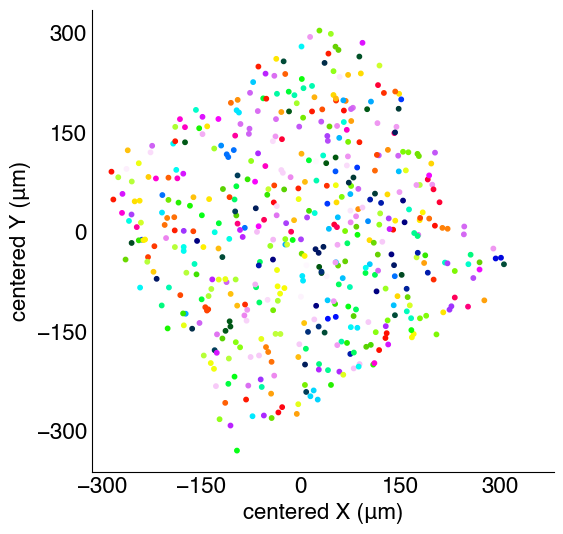

In [46]:
# color the neurons by their position in the rastermap

# POSITIONS OF ALL NEURONS
plt.figure(figsize=(6, 6))

# color the neurons in this plot with c = ?????, where ???? is the embedding position of each neuron from the Rastermap model
#bigger marker size
plt.scatter(ypos, xpos, s=10, c=embedding, cmap="gist_ncar")
plt.xlabel('centered X (μm)')
plt.ylabel('centered Y (μm)')
# hide the tick label length
plt.tick_params(length=0)
#set x tick labels as -300 to 300
plt.xticks([-300, -150, 0, 150, 300])
plt.xlim([-300, 300])

plt.yticks([-300, -150, 0, 150, 300])
plt.ylim([-300, 300])
#hide the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axis("square")
plt.savefig("centeredXY_M3.svg", format="svg")

In [ ]:
#compute the top PCs of the neural data
from sklearn.decomposition import TruncatedSVD

# this function returns the left singular vectors scaled by the singular values
Vsv = TruncatedSVD(n_components = 50).fit_transform(spks.T)

# REPLACE ????? to normalize the singular vectors to unit norm (across time)
V = Vsv.copy() / (Vsv**2).sum(axis=0)**0.5

# project the spiking data onto the singular vectors 
U = spks @ V

# renormalize the neural projections
U /= (U**2).sum(axis=0)**0.5

In [ ]:
# plot the PCs in time
fig = plt.figure(figsize=(12,6), dpi=200)
grid = plt.GridSpec(9, 1, figure=fig, hspace = 0.4)

# plot running speed
ax = plt.subplot(grid[0, 0])
ax.plot(contrast[0,xmin:xmax], color=kp_colors[0])
ax.set_xlim([0, xmax-xmin])
ax.axis("off")
ax.set_title("running speed", color=kp_colors[0])

pc_colors = plt.get_cmap("viridis")(np.linspace(0,0.9,8))
for j in range(8):
    ax = plt.subplot(grid[j+1])
    ax.plot(Vsv[xmin:xmax, j], color=pc_colors[j])
    ax.set_xlim([0, xmax-xmin])
    ax.axis("off")
    ax.set_title(f"PC {j+1}", color=pc_colors[j])

In [ ]:
# Make a scatter plot of PC1 vs PC2 across all timepoints. 
# Color the points by running speed. Do you see any structure? 

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
# REPLACE ????? with PC1 and PC2
ax.scatter(Vsv[:,0], Vsv[:,1], c=contrast, cmap = 'viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
#behavioral analysis
fig = plt.figure(figsize=(12,6), dpi=200)
grid = plt.GridSpec(len(beh_names), 1, figure=fig, hspace = 0.4)

n_beh = len(beh_names)
for j in range(n_beh):
    ax = plt.subplot(grid[j])
    ax.plot(beh[17*xmin:17*xmax] == j, color=kp_colors[j])
    ax.set_xlim([0, 17*(xmax-xmin)])
    ax.axis("off")
    ax.set_title(beh_names[j], color=kp_colors[j])

In [ ]:
# downsample the behavioral data to the neural data
from scipy.ndimage import gaussian_filter1d # here we import a smoothing function
from scipy.interpolate import interp1d # importing an interpolation function

# initialize empty matrix
beh_ds = np.zeros((len(tneural), n_beh), "float32")

for j in range(n_beh):
    # filter the data
    # (smoothing scale proportional to difference in sampling rate)
    bsmooth = gaussian_filter1d(beh == j, 50/3.2) 
    
    # interpolate
    f = interp1d(tcam, bsmooth)
    
    # REPLACE ?????
    # look up the usage of interp1d to find out how to apply the function f at new times "tneural"
    beh_ds[:,j] = f(tneural)

print(beh_ds.shape)

In [ ]:
# plot the traces again
fig = plt.figure(figsize=(12,6), dpi=200)
grid = plt.GridSpec(len(beh_names), 1, figure=fig, hspace = 0.4)
for j in range(n_beh):
    ax = plt.subplot(grid[j])
    
    # REPLACE ????? to plot the interpolated behaviors from timepoint xmin to timepoint xmax
    ax.plot(beh_ds[xmin:xmax, j], color=kp_colors[j])
    
    ax.set_xlim([0, (xmax-xmin)])
    ax.axis("off")
    ax.set_title(beh_names[j], color=kp_colors[j]) 

In [ ]:
# split into train-test
# * use interleaved segments *
n_segs = 20
n_len  = n_time / n_segs
sinds = np.linspace(0, n_time - n_len, n_segs).astype(int)
itest = (sinds[:,np.newaxis] + np.arange(0, n_len*0.25, 1, int)).flatten()
itrain = np.ones(n_time, "bool")
itrain[itest] = 0
itest = ~itrain

plt.plot(itrain)
plt.title("train times")
plt.show()

In [ ]:
## predict using behavior traces
# regularized linear regression from behavior to neural PCs

XtX = beh_ds[itrain].T @ beh_ds[itrain]
XtY = beh_ds[itrain].T @ Vsv[itrain]
lam = 1e1 # regularizer

# REPLACE ?????
# add a ridge regularizer to the linear regression with parameter "lam" 
XtX = XtX + lam * np.eye(n_beh)

# regression matrix
A = np.linalg.solve(XtX, XtY)

# prediction on test data, REPLACE ????? with behaviors on test points and the regression matrix
Vpred = beh_ds[itest] @ A

# variance explained per PC
residual = ((Vpred - Vsv[itest])**2).sum(axis=0)
varexp_PC = 1 - residual / (Vsv[itest]**2).sum(axis=0)

# overall varexp
varexp = 1 - residual.sum() / (Vsv[itest]**2).sum()

print(f"overall variance explained = {varexp}")

In [ ]:
#plot　the trace of the first 8 PCs
fig = plt.figure(figsize=(12,6), dpi=200)
grid = plt.GridSpec(8, 1, figure=fig, hspace = 0.4)

for j in range(8):
    ax = plt.subplot(grid[j])
    ax.plot(Vsv[itest][xmin:xmax, j], color=pc_colors[j])
    ax.plot(Vpred[xmin:xmax, j], color="k", linestyle="--")
    ax.set_xlim([0, xmax-xmin])
    ax.axis("off")
    ax.set_title(f"PC {j+1}, varexp = {varexp_PC[j]:.2f}", color=pc_colors[j])
    if j==0:
        ax.legend(["PC", "prediction"], loc="upper right")

In [ ]:
from neuropop import nn_prediction
import torch
# use CPU if GPU is not available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# declare the model
pred_model = nn_prediction.PredictionNetwork(n_in=beh.shape[-1], n_kp=22, identity=False, 
                                             n_filt=10, n_latents=0,
                                             n_out=Vsv.shape[-1], n_core_layers=1,
                                             relu_wavelets=False, relu_latents=False)
# put model on the selected device
pred_model.to(device)

print(pred_model)


In [ ]:
# Ensure the input data has the correct shape
beh_reshaped = beh.reshape(-1, beh.shape[-1])
Vsv_reshaped = Vsv.reshape(-1, Vsv.shape[-1])

y_pred_all, ve_all, itest = pred_model.train_model(beh_reshaped, Vsv_reshaped, tcam, tneural, delay=-1,
                                                    learning_rate=1e-3, n_iter=300,
                                                    device=device, verbose=True)
Vpred_conv = y_pred_all
itest = itest.flatten() # we run using batches of data so we now flatten it

# variance explained per PC
residual = ((Vpred_conv - Vsv_reshaped[itest])**2).sum(axis=0)
varexp_PC_conv = 1 - residual / (Vsv_reshaped[itest]**2).sum(axis=0)